Lezione ipirata al libro: [Deep Learning from Scratch](https://www.oreilly.com/library/view/deep-learning-from/9781492041405/)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Callable, List

# **FUNZIONI**

Quando diciamo che "qualcosa è funzione di qualcos'altro", intendiamo che esiste una funzione che mappa la trasformazione di un elemento a partire da un altro elemento.

Es. Dire che **B** è in funzione di **A**,  equivale a dire che la lettera **B** è determinata dala letter **A** attraverso la funzione ***passa alla lettera successiva***.

**Funzioni Lineari e non lineari**
Semplificando molto e guardando la differenza da un punto esclusivamenet grafico, potremmo dire che:

 - le funzioni lineari tracciano linee rette con pendenza costante, come $ f(x) = 2x + 3 $

 - le funzioni non lineari tracciano curve con pendenza variabile, come $ f(x) = x^2 + 2x + 1 $.

In sintesi, le funzioni lineari  hanno un cambiamento costante, mentre le non lineari sono caratterizzate da cambiamenti variabili.

### **Matematica**

\begin{align}
f\left ( x \right ) = x^{2}
\end{align}

\

Una funzione prende un valore e lo trasforma secondo determinate regole.

Es. una funzione che eleva al quadrato, trasforma quasiasi numero negativo o positivo in un nuovo valore positivo.



### **Diagramma**

\begin{align}
x \rightarrow   \mathbf{\left [ \ f  \ \right ]} \rightarrow x^2
\end{align}

\begin{align}
2 \rightarrow   \mathbf{\left [ \ power^2  \ \right ]} \rightarrow 4
\end{align}

\begin{align}
3 \rightarrow   \mathbf{\left [ \ power^2  \ \right ]} \rightarrow 9
\end{align}

\

Un altro modo di considerare una funzione è quello di visualizzarle come delle "scatole computazionali" dove i valori di input vengono trasformati in valori di output.

### **Codice**



```python
numpy.power(x, 2)
```

Per ultima, la rappresentazione che da codice implementa il calcolo della funzione.


In [ ]:
Math_Real = np.ndarray | float

In [ ]:
def sum_2(x: Math_Real):
  return x + 2


def power_2(x: Math_Real):
  return np.power(x, 2)


def sigmoid(x: Math_Real) -> np.ndarray:
  return 1 / (1 + np.exp(-x))

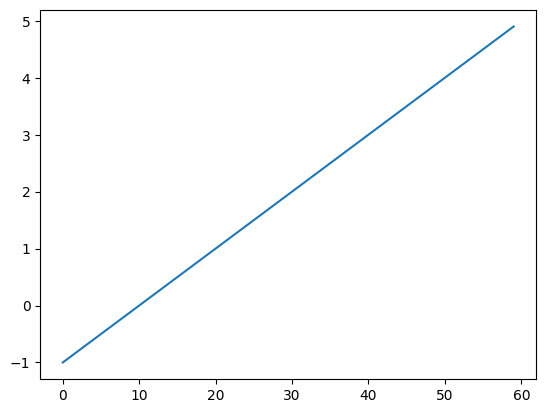

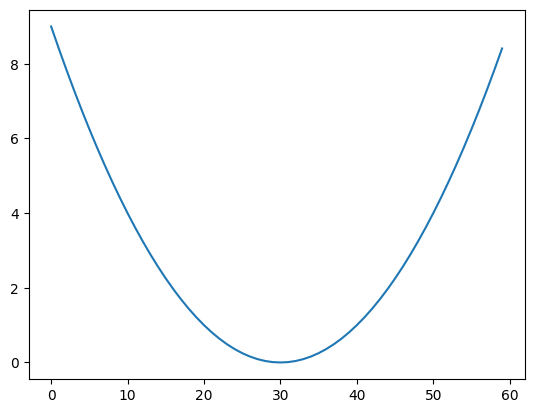

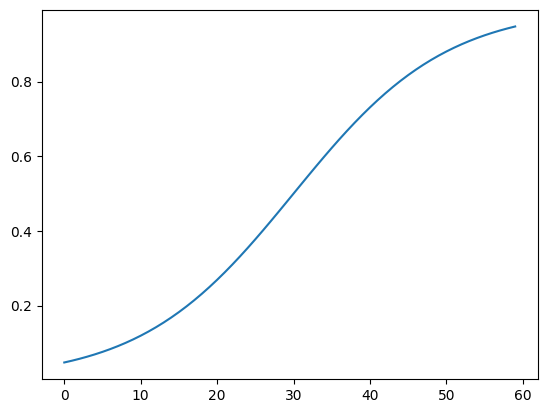

In [ ]:
x_array = np.arange(-3, 3, 0.1)

plt.plot(sum_2(x_array))
plt.show()
plt.plot(power_2(x_array))
plt.show()
plt.plot(sigmoid(x_array))
plt.show()

# **DERIVATA DI UNA FUNZIONE**

Possiamo riassumere il concetto di derivata in un punto, descrivendola come il tasso di variazione della funzione in quel punto.

**Matematica**

\begin{align}
\frac{\partial f}{\partial x}=\lim_{h\rightarrow 0} \frac{f(x + h) - f(x)}{h}
\end{align}

\

\begin{align}
f(x) = x^2 \Rightarrow f'(x) = 2x
\end{align}

\

Possiam approssimare il limite fornendo un valore molto piccolo all'incremento h

\

\begin{align}
\frac{\partial f}{\partial x}= \frac{f(x + 0.001) - f(x)}{0.001}
\end{align}

**Diagramma**

\begin{align}
3 \rightarrow   \mathbf{\left [ \ power^2  \ \right ]} \rightarrow 9
\\
3 \rightarrow   \mathbf{\left [ \ deriv(power^2)  \ \right ]} \rightarrow 6
\end{align}


**Codice**

In [ ]:
Math_Function = Callable[[Math_Real], Math_Real]

In [ ]:
def deriv(f: Math_Function,
          x: Math_Real,
          h: float) -> Math_Real:
  '''
  Calcola la derivata di una funzione per ogni elemento della matrice input:

  @type f: Callable
  @param f: l'oggetto Callable prende una lista di funzioni che a loro volta
            prendono e ritornano o un singolo valore float o un array

  @type x:  np.ndarray | float
  @param x: valore/i da processare

  @type h: float
  @param h: incremento da utilizzare nel calcolo della derivata
  '''

  return (f(x + h) - f(x)) / h




In [ ]:

print(deriv(power_2, 3, 0.001))

6.000999999999479


# **FUNZIONI COMPOSTE**

Uno dei concetti fondamentali alla base di un modello di AI è quello di sintetizzare una descrizione complessa attraverso la composizione di funzioni più semplici.

**Matematica**

\begin{align}
f_1\left ( x \right ) = x + 2
\end{align}
\begin{align}
f_2\left ( x \right ) = x^{2}
\\
\end{align}



\begin{align}
f_2\left ( f_1\left (x \right ) \right ) = (x + 2)^2
\end{align}

\

Una funzione prende un valore e lo trasforma secondo determinate regole.

Es. una funzione che eleva al quadrato, trasforma quasiasi numero negativo o positivo in un nuovo valore positivo.


**Diagramma**

\begin{align}
x \rightarrow   \mathbf{\left [ \ f_1  \ \right ]}  \rightarrow
 \mathbf{\left [ \ f_2  \ \right ]}  \rightarrow y
\end{align}

\begin{align}
3 \rightarrow   \mathbf{\left [ \ f_1  \ \right ]}  \rightarrow
 \mathbf{\left [ \ f_2  \ \right ]}  \rightarrow 25
\end{align}


**Codice**

In [ ]:
Math_ComposedFunction = List[Math_Function]

In [ ]:
def compute_composed_function_2(cf: Math_ComposedFunction, x: Math_Real):
  assert len(cf) == 2, "Questa implementazione supporta massimo due funzioni annidate"

  f1 = cf[0]
  f2 = cf[1]
  return f2(f1(x))



In [ ]:
def compute_composed_function(cf: Math_ComposedFunction, x: Math_Real):
  y = x
  for f in cf:
    y = f(y)
  return y

In [ ]:
print(compute_composed_function([sum_2, power_2], 3))

25


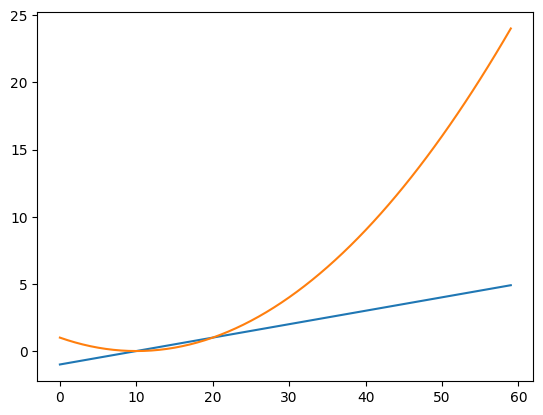

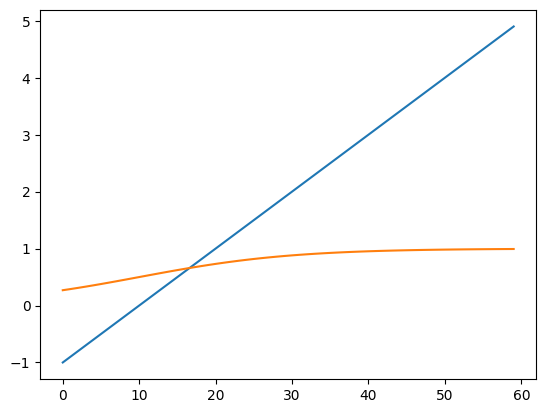

In [ ]:
plt.plot(sum_2(x_array))
plt.plot(compute_composed_function([sum_2, power_2], x_array))
plt.show()
plt.plot(sum_2(x_array))
plt.plot(compute_composed_function([sum_2, sigmoid], x_array))
plt.show()

# **DERIVATA FUNZIONE COMPOSTA**

Se una funzione è composta da funzioni derivabili, allora è anche essa stessa derivabile.

\

La tecnica usata per svolgere la derivata di una funzione composta si chiama
***regola della catena***.

**Matematica**

Si comincia calcolando la derivata della funzione più esterna, prendendo il suo contenuto come un unica incognita e la si moltiplica per la derivata della funzione annidata successivamente. Si procede in qusto modo fino all'ultima funzione annidata

\

\begin{align}
\frac{\partial f}{\partial x} =
\frac{\partial f_2}{\partial}(f_1(x)) \times
\frac{\partial f_1}{\partial x}
\end{align}

\


\begin{align}
f(x) = (x + 2)^2 \Rightarrow
f'(x) =
f_2' (x + 2) \times f'_1(x)  = 2(x + 2) \times  1
\end{align}






**Diagramma**




\begin{align}
\left.\begin{matrix}
 & x \rightarrow  [f_1] \rightarrow y_1
 \\
 \\
 & x \rightarrow  [f_2] \rightarrow y_2
\end{matrix}\right\}
→ \left [ y_1 \times y_2  \right ]  → y
\end{align}


\

\begin{align}
\left.\begin{matrix}
 & 3 \rightarrow  [f_1] \rightarrow 10
 \\
 \\
 & 3 \rightarrow  [f_2] \rightarrow 1
\end{matrix}\right\}
→ \left [ 10 \times 1 \right ]  → y
\end{align}


**Codice**

In [ ]:
def compute_chain_rule_2(cf: Math_ComposedFunction, x: Math_Real):
  assert len(cf) == 2, "Questo esempio supporta massimo due funzioni annidata"

  f1 = cf[0]
  f2 = cf[1]

  h = 0.001

  # df_2 / dx
  df2_dx = deriv(f2, f1(x), h)

  # df_1 / dx
  df1_dx = deriv(f1, x, h)


  return df2_dx * df1_dx

In [ ]:
print(compute_chain_rule_2([sum_2, power_2], 3))

10.000999999997049


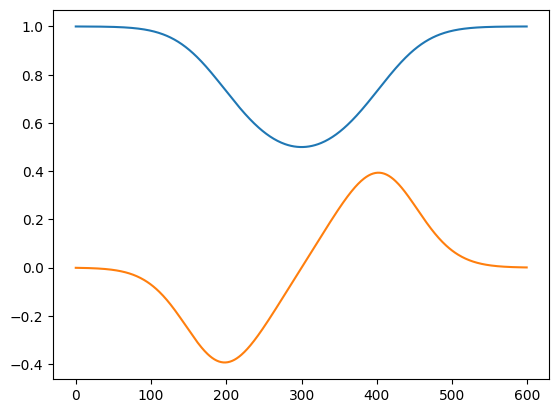

In [ ]:


x_array = np.arange(-3, 3, 0.01)
y_array = compute_composed_function_2([power_2, sigmoid], x_array)
dx_array = compute_chain_rule_2([power_2, sigmoid], x_array)

plt.plot(y_array)
plt.plot(dx_array)
plt.show()

In [ ]:
def compute_chain_rule_3(cf: Math_ComposedFunction, x: Math_Real):
  assert len(cf) == 3, "Questo esempio supporta massimo due funzioni annidata"

  f1 = cf[0]
  f2 = cf[1]
  f3 = cf[2]

  h = 0.001

  y_1 = f1(x)
  y_2 = f2(y_1)


  # df3 / dx
  df3_dx = deriv(f3, y_2, h)
  # df2 / dx
  df2_dx = deriv(f2, y_1, h)
  # df1 / dx
  df1_dx = deriv(f1, x, h)

  return df3_dx * df2_dx * df1_dx

In [ ]:
def compute_chain_rule(cf: Math_ComposedFunction, x: Math_Real, h = 0.001):

  # -> FORWARD
  forward = [x]
  y = x
  for i, f in enumerate(cf[:-1]):
    y = f(y)
    forward.append(y)


  # <- BACKWARD
  result = 1
  for i, f in enumerate(cf):
    result *= deriv(f, forward[i], h)

  return result


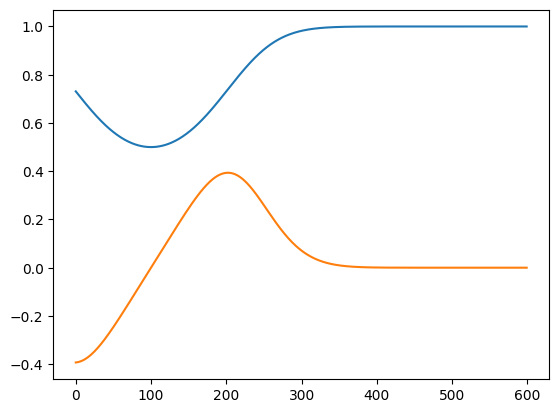

In [ ]:
y_array = compute_composed_function([sum_2, power_2, sigmoid], x_array)
dx_array = compute_chain_rule([sum_2, power_2, sigmoid], x_array)

plt.plot(y_array)
plt.plot(dx_array)
plt.show()

**Codice**